# Assignment 1

#### Roll Number : 2018113003, 2018114001

## Question 2

In [1]:
## Importing dependancies

from sklearn import linear_model,preprocessing
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt

## Formatting the data

Formatting the data in a manner, so as to make it compatible with the previous question model, to make the whole proces similar

In [2]:
## Opening the dataset

dataset = open("Q2_data/Fx_test.pkl",'rb')
test_y = pickle.load(dataset)
dataset = open("Q2_data/X_test.pkl",'rb')
test_x = pickle.load(dataset)
dataset = open("Q2_data/Y_train.pkl",'rb')
train_y = pickle.load(dataset)
dataset = open("Q2_data/X_train.pkl",'rb')
train_x = pickle.load(dataset)

In [3]:
## Making the dataset compatible with the previous code

train_x = train_x.reshape(8000)
train_y = train_y.reshape(8000)

train = []
for i in range(8000):
    train.append([train_x[i],train_y[i]])
    
train = np.asarray(train)

test_x = test_x.reshape(80)
test_y = test_y.reshape(80)

test = []
for i in range(80):
    test.append([test_x[i],test_y[i]])
    
test = np.asarray(test)

## Lengths for dividing the training set into 20 datasets
lengths = [[i,399 + i] for i in range(0,len(train),400)]

## Getting a model

Getting the polynomials required for predicting the values of the testing set, and raising the polynomial features of the x coordinate of the teting set for availing the predict() function.

To do that:
- Loop over all the degrees, and the datasets ( which in this case means looping ove the list which contained the ranges of the training sets ) 
- Generate an object which raises the features to the $i^{th}$ degree, after which append the raised features to the model list
- Raise the features of the test set as well, so it can use the prdict() function

In [4]:
## Modelling

model = []
X = []
degree = 10
for i in range(degree):
    for l in lengths:
        mult = preprocessing.PolynomialFeatures(i)
        X.append(mult.fit_transform(train[l[0]:l[1],None,0]))
        model.append(linear_model.LinearRegression().fit(X[-1],train[l[0]:l[1],None,1]))
        
test_raised = []
for i in range(degree):
    mult = preprocessing.PolynomialFeatures(i)
    test_raised.append(mult.fit_transform(test[:,None,0]))

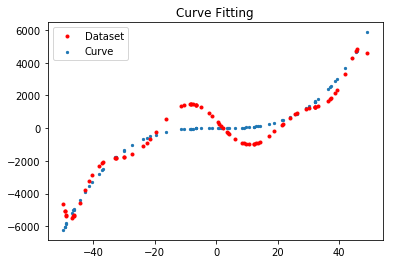

In [5]:
plt.scatter(test[:,0],test[:,1],s=5)
plt.plot(test[:,None,0], model[-1].predict(test_raised[-1]),"r.")
plt.title('Curve Fitting')
plt.legend(['Dataset','Curve'])
plt.show()

## Getting the prediction matrix

Getting the matrix that has the prediction of every point across every model across every degree in a $10x10x500$ matrix, and making it a numpy array for vecorized operations

To do that :
- Loop across the models (100 of them), and append the matrix with the prediciton values.
- After every 10 iterations, the degree of the model increases by 1, so append the matrix of the predictions per degree into the complete prediction matrix

In [17]:
## Average, mean value of a point

predict = []
poly_degree = []
for i in range(len(model)):
    if i%20 == 0 and i!=0 or i == len(model) - 1:
        poly_degree = np.asarray(poly_degree)
        predict.append(poly_degree)
        poly_degree = []
    poly_degree.append(model[i].predict(test_raised[i//20]))
predict = np.asarray(predict)

## Calculating Bias

For calculation of bias, first for every 10 models of a single degree, compute mean for every point. After that compute $E(y - \sum f(x)/n)$ and make it for every degree.

Hence, calculation of bias :

$ bias = E(\frac{\sum_{x_i \in degree} f(x_i)}{n} - y_i)$

## Calculating Variance

Similarly for the computation of bias, calculate the standard deviation at every point, and then average them over the common degree, after which plot it as a function of degree.

Hence, the calculation of variance :

$ var = Var(Avg (f(x_i)) $

In [7]:
## Calculating Bias 

bias = [(predict[i].mean(axis = 0)) for i in range(len(predict))]
bias = np.asarray(bias)
bias = [np.absolute((bias[i] - test[:,None,1])**2).mean() for i in range(len(bias))]
bias = np.asarray(bias)

In [8]:
## Calculating Variance

variance = [(predict[i].var(axis = 0)) for i in range(len(predict))]
variance = [variance[i].mean() for i in range(len(variance))]
variance = np.asarray(variance)

In [9]:
## Values of the Bias and Variance

print('Bias Squared :')
print(bias)
print()
print('Variance :')
print(variance)

Bias Squared :
[6759266.62171637  996850.66535577  952754.4819269     8702.84530966
   10094.36392117    8523.34369643    9747.65509327    9764.94791248
    9692.16991858   12645.36908885]

Variance :
[ 22785.7389557   69823.96649567 126654.26175119 150410.08905089
 213079.08537276 276114.68264684 317583.15218268 358530.50836899
 405238.82351891 451949.82876813]


## Plotting

Plotting the graphs of bias and variance, to get the general trends of the values using the graphs

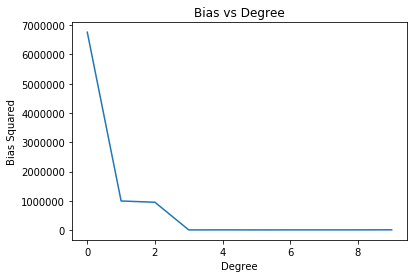

In [10]:
plt.plot(bias)
plt.xlabel('Degree')
plt.ylabel('Bias Squared')
plt.title('Bias vs Degree')
plt.show()

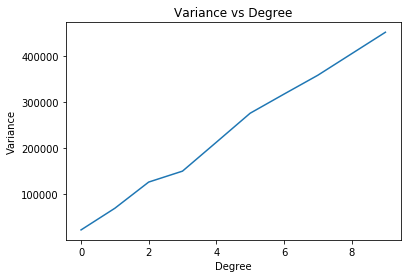

In [11]:
plt.plot(variance)
plt.xlabel('Degree')
plt.ylabel('Variance')
plt.title('Variance vs Degree')
plt.show()

## Bias - Variance Observations

The dataset given, is a highly noisy $x^3$ curve, so the bet fitting og the dataset is at $degree = 3$. Due to that, the decrease in the value of bias at degree = 3 is very high, and it is an optimum of bias vs variance tradeoff, as can be seen from the graph below.

It can also be seen that there is no noise in the training set, so curve fitting is really easy for an $x^3$ curve.

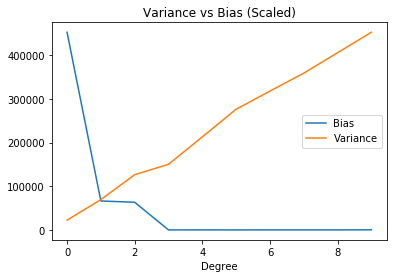

In [13]:
plt.plot(bias * (variance.max() / bias.max()))
plt.plot(variance)
plt.xlabel('Degree')
plt.legend(['Bias','Variance'])
plt.title('Variance vs Bias (Scaled)')
plt.show()